#### Problem Statement

I decided to treat this as a classification problem by creating a new binary
variable affair (did the woman have at least one affair?) and trying to
predict the classification for each woman.

#### Dataset
The dataset I chose is the affairs dataset that comes with Statsmodels. It
was derived from a survey of women in 1974 by Redbook magazine, in
which married women were asked about their participation in extramarital
affairs. More information about the study is available in a 1978 paper from
the Journal of Political Economy.

#### Description of Variables

The dataset contains 6366 observations of 9 variables:
1. rate_marriage: woman's rating of her marriage (1 = very poor, 5 = very good)
2. age: woman's age
3. yrs_married: number of years married
4. children: number of children
5. religious: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
6. educ: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
7. occupation: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = acher/nurse/writer/technician/skilled, 5 = managerial/business, 6 =professional with advanced degree)
8. ocupation_husb: husband's occupation (same coding as above)
9. affairs: time spent in extra-marital affairs

#### Importing Necessary Libraries

In [53]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import seaborn as sns
dta = sm.datasets.fair.load_pandas().data

In [2]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [59]:
dta['affair'] = (dta.affairs>0).astype(int) 

In [60]:
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [8]:
dta[dta.affair==0]

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
2053,4.0,32.0,9.0,2.0,3.0,14.0,2.0,4.0,0.0,0
2054,4.0,27.0,6.0,0.0,2.0,14.0,3.0,4.0,0.0,0
2055,4.0,22.0,2.5,0.0,2.0,14.0,3.0,2.0,0.0,0
2056,5.0,42.0,23.0,4.0,3.0,16.0,3.0,5.0,0.0,0
2057,5.0,27.0,2.5,1.0,3.0,20.0,2.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0.0,0


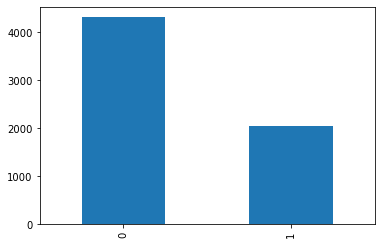

In [12]:
dta['affair'].value_counts().plot(kind='bar')

#### Desriptive statistics

Checking for the null values

In [8]:
dta.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.705374
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,2.203374
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,0.484848
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,57.599991


As there are no null values we need not to replace any kind of data

#### Distribution plots 

In [29]:
data_affairs = dta[dta.affair>0].drop(columns=['affairs','affair'])

In [30]:
data_affairs.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0


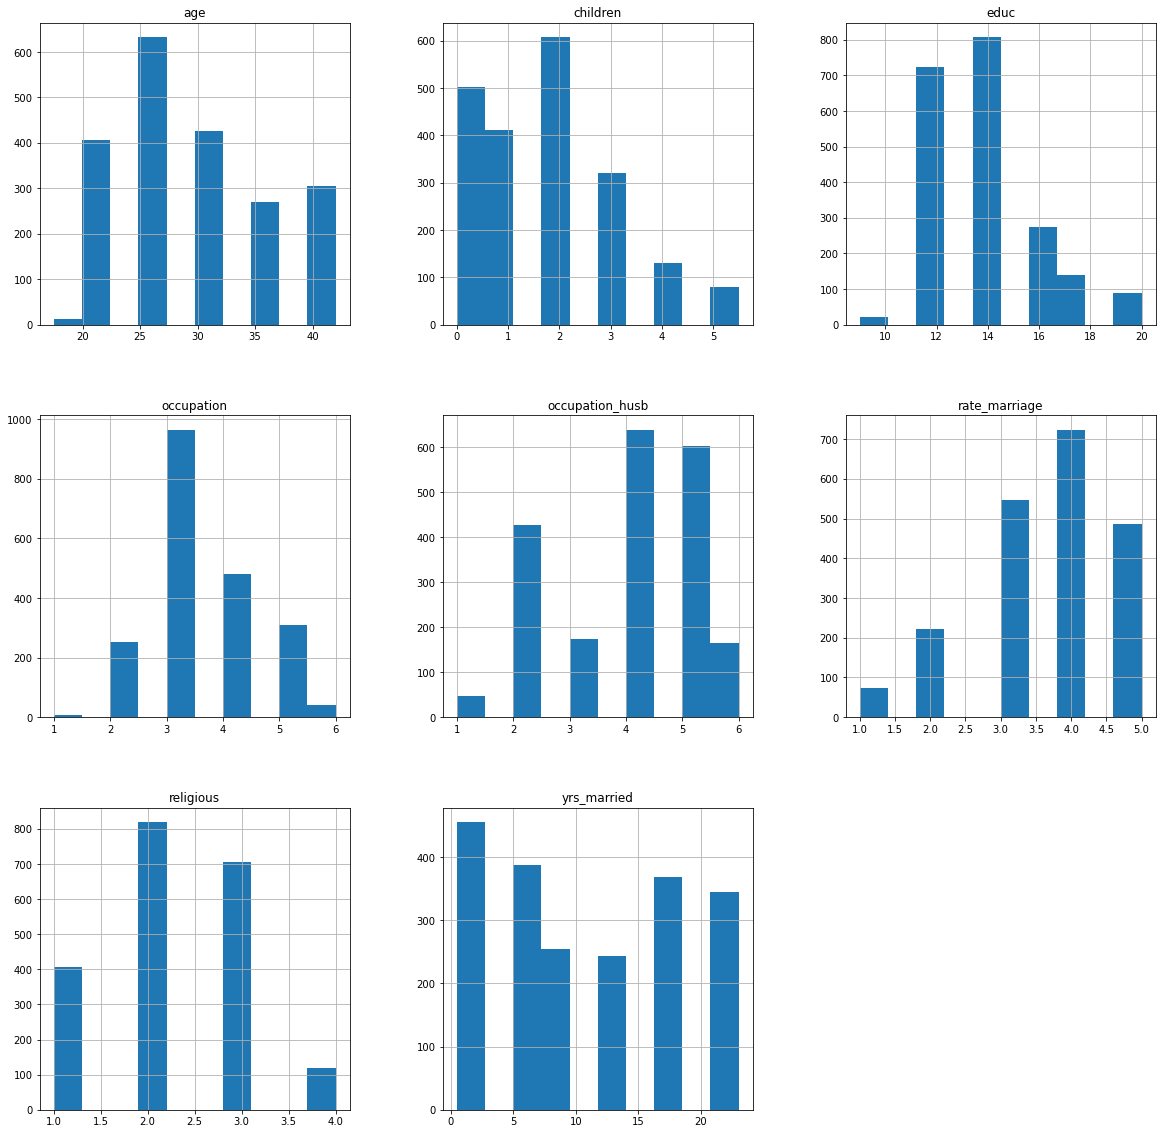

In [52]:
p = data_affairs.hist(figsize=(20,20))

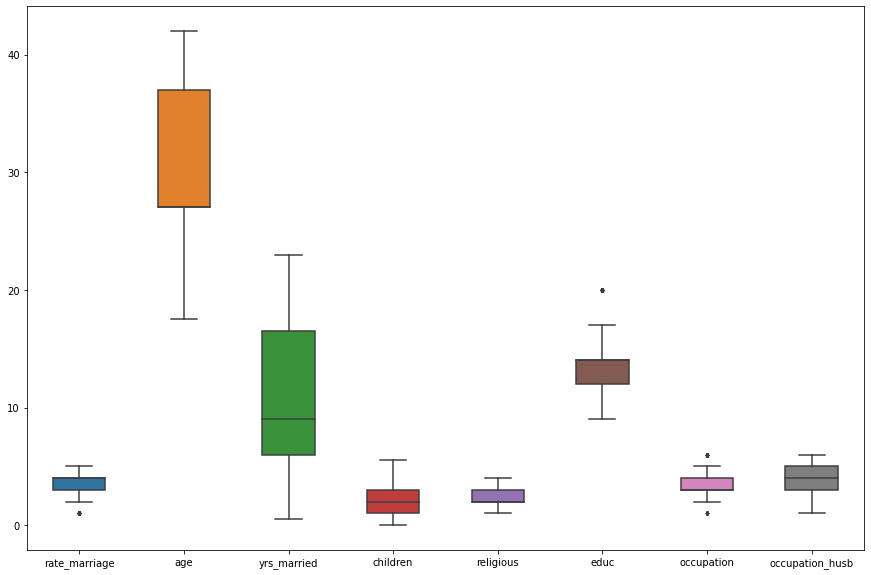

In [37]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data_affairs,ax=ax,width=0.5,fliersize=3)

In [39]:
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children +  religious + educ + C(occupation) + C(occupation_husb)',dta, return_type="dataframe")

In [41]:
X.head()

,Intercept,C(occupation)[T.2.0],C(occupation)[T.3.0],C(occupation)[T.4.0],C(occupation)[T.5.0],C(occupation)[T.6.0],C(occupation_husb)[T.2.0],C(occupation_husb)[T.3.0],C(occupation_husb)[T.4.0],C(occupation_husb)[T.5.0],C(occupation_husb)[T.6.0],rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [42]:
y.head()

,affair
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [43]:
X = X.rename(columns =
{'C(occupation)[T.2.0]':'occ_2',

'C(occupation)[T.3.0]':'occ_3',
'C(occupation)[T.4.0]':'occ_4',
'C(occupation)[T.5.0]':'occ_5',
'C(occupation)[T.6.0]':'occ_6',
'C(occupation_husb)[T.2.0]':'occ_husb_2',
'C(occupation_husb)[T.3.0]':'occ_husb_3',
'C(occupation_husb)[T.4.0]':'occ_husb_4',
'C(occupation_husb)[T.5.0]':'occ_husb_5',
'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [48]:
y = np.ravel(y)

In [49]:
y

array([1., 1., 1., ..., 0., 0., 0.])

In [50]:
X.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0


In [63]:
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [64]:
X_scaled

array([[ 0.        ,  2.531984  , -0.88131913, ...,  1.11844056,
         0.65334148,  1.28115287],
       [ 0.        , -0.3949472 ,  1.13466276, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 0.        ,  2.531984  , -0.88131913, ..., -0.97454634,
        -0.48522185,  0.82198052]])

In [66]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

vif

C:\Users\appcloud\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,vif,Features
0,NaN,Intercept
1,19.340780,occ_2
2,39.335618,occ_3
3,32.931910,occ_4
4,17.057165,occ_5
5,3.697959,occ_6
6,5.566292,occ_husb_2
7,2.991070,occ_husb_3
8,6.930281,occ_husb_4
9,6.577077,occ_husb_5


Seems age and yrs_married are correlated to each other, we can remove age field from the data

In [68]:
x = X.drop('age',axis=1)

In [71]:
x_scaled = scalar.fit_transform(x)

In [72]:
x_scaled

array([[ 0.        ,  2.531984  , -0.88131913, ...,  1.11844056,
         0.65334148,  1.28115287],
       [ 0.        , -0.3949472 ,  1.13466276, ...,  1.11844056,
        -1.62378518, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -1.62378518,  0.82198052],
       ...,
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.97454634,
        -0.48522185, -0.09636416],
       [ 0.        , -0.3949472 ,  1.13466276, ..., -0.27688404,
         0.65334148, -0.09636416],
       [ 0.        ,  2.531984  , -0.88131913, ..., -0.97454634,
        -0.48522185,  0.82198052]])

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features'] = x.columns

C:\Users\appcloud\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [74]:
vif

,vif,features
0,NaN,Intercept
1,19.331745,occ_2
2,39.312316,occ_3
3,32.903214,occ_4
4,17.040554,occ_5
5,3.694896,occ_6
6,5.556756,occ_husb_2
7,2.981891,occ_husb_3
8,6.920439,occ_husb_4
9,6.555388,occ_husb_5


#### Splitting train and test data

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=0)

#### Applying Logistic Regression Model for traning data

In [77]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

#### Saving our Model

In [78]:
import pickle
with open('affairModelPred.sav','wb') as f:
    pickle.dump(log_reg,f)
with open('standardScaler.sav','wb') as f:
    pickle.dump(scalar,f)

#### Prediction of Test data

In [79]:
y_pred = log_reg.predict(x_test)

In [80]:
y_pred

array([1., 0., 0., ..., 1., 0., 1.])

#### Accuracy of test data

In [81]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
accuracy = accuracy_score(y_test,y_pred)

In [82]:
accuracy

0.7362637362637363

#### Prediction of Training data

In [88]:
y_pred_train = log_reg.predict(x_train)
y_pred_train

array([0., 0., 0., ..., 0., 0., 0.])

#### Accuracy of Training Data

In [89]:
accuracy_train = accuracy_score(y_train,y_pred_train)
accuracy_train

0.7185781618224666

Our model is not overfitting

#### Confusion Matrix

In [83]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[797,  88],
       [248, 141]], dtype=int64)

In [84]:
true_pos = conf_mat[0][0]
false_pos = conf_mat[0][1]
false_neg = conf_mat[1][0]
true_neg = conf_mat[1][1]

#### Accuracy

In [85]:
Accuracy = (true_pos+true_neg)/(true_pos+true_neg+false_neg+false_pos)
Accuracy

0.7362637362637363

#### Precision

In [87]:
Precission = true_pos/(true_pos+false_pos)
Precission

0.9005649717514125

#### Recall

In [90]:
Recall = true_pos/(true_pos+false_neg)
Recall

0.7626794258373206

#### F1 Score

In [91]:
F1_score = 2*(Recall*Precission)/(Recall+Precission)
F1_score

0.8259067357512954

####  ROC AUC Score

In [92]:
auc = roc_auc_score(y_test,y_pred)
auc

0.6315164190376599

#### ROC Curve

In [93]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

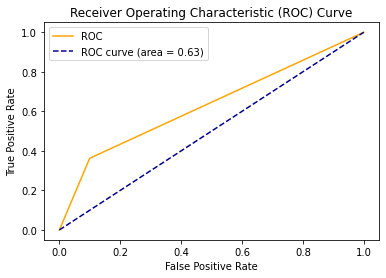

In [94]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()